/tmp/ipykernel_17115/639891697.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = pd.DataFrame({'Cantidad': data}, index=pd.date_range(start='2020-01-01', periods=periods, freq='M'))


<Figure size 1000x500 with 0 Axes>

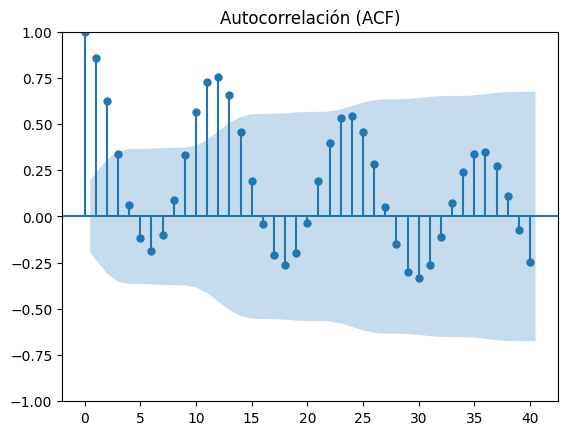

KeyError: 'ALIGNED'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from scipy.fftpack import fft

# ✅ Ejemplo de Datos Simulados
np.random.seed(42)
periods = 100
time = np.arange(periods)
seasonality = 10 * np.sin(2 * np.pi * time / 12)  # Ciclo de 12 meses
trend = 0.2 * time
noise = np.random.normal(0, 2, periods)
data = trend + seasonality + noise

# 📊 Serie Temporal
df = pd.DataFrame({'Cantidad': data}, index=pd.date_range(start='2020-01-01', periods=periods, freq='M'))

# 🔄 1. Autocorrelación para detectar ciclos
plt.figure(figsize=(10,5))
plot_acf(df['Cantidad'], lags=40)
plt.title('Autocorrelación (ACF)')
plt.show()

# 🌀 2. FFT para encontrar frecuencias dominantes
fft_vals = fft(df['Cantidad'])
fft_freq = np.fft.fftfreq(len(fft_vals))

# Magnitud de las frecuencias
magnitude = np.abs(fft_vals)

# Gráfico de Frecuencias
plt.figure(figsize=(10,5))
plt.plot(fft_freq[1:len(fft_freq)//2], magnitude[1:len(magnitude)//2])
plt.title('FFT - Frecuencias Dominantes')
plt.xlabel('Frecuencia')
plt.ylabel('Magnitud')
plt.show()
